# Inleiding Python 🐍 Fysica Practicum

### Dmitry Kouznetsov, KULeuven
<br>
<div >
    <img style="display: block; margin-left: auto; margin-right: auto; width: 70%;" src="https://files.realpython.com/media/Newbie_Watermarked.a9319218252a.jpg">
</div>

# Waarom Python?


* Populaire taal voor algemeen gebruik met **dynamisch typesysteem**
* Traag voor zware berekeningen, maar kan 'number-crunchen' in **modules gelinkt met code geschreven in C** (zoals NumPy), of andere talen: C++, Rust, etc.
* **NumPy** module laat toe om **gevectoriseerde berekeningen** *makkelijk* uit te voeren
* Je kan de documentatie heel gemakkelijk online terugvinden, bijvoorbeeld voor NumPy: https://numpy.org/doc/stable/docs/index.html. De documentatie is altijd een goede plek om te starten als je niet meteen weet hoe ergens aan te beginnen of als je syntaxproblemen ondervindt.

Meer info: https://scipy-lectures.org/intro/intro.html#why-python

# Waarom NumPy?

Voorbeeld:
$$f(x) = \sin^2(x) + 2$$

In [1]:
import numpy as np
import math

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
print("Standaard 'math' module:")
%timeit [math.sin(x)**2 + 2 for x in range(10_000)]

print("\nMet 'NumPy' module:")
%timeit x = np.arange(0, 1, 10_000) ; np.sin(x)**2 + 2

print("\nWaw!")

Standaard 'math' module:
2.57 ms ± 213 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Met 'NumPy' module:
3.14 µs ± 75.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Waw!


# Slicing in Numpy

<br>
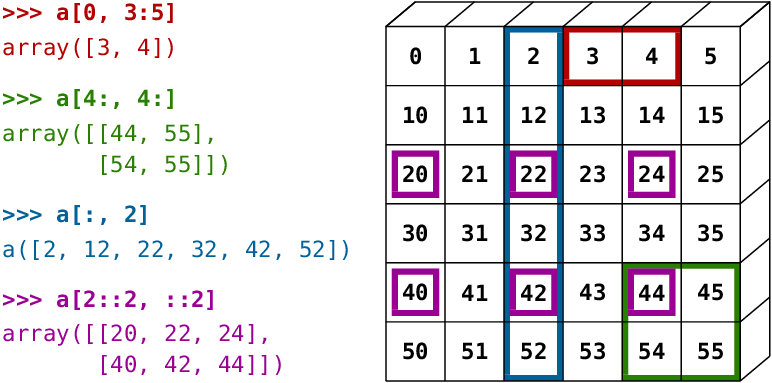

# Plotten voor dummies
<br>
<div >
    <img style="display: block; margin-left: auto; margin-right: auto; width: 70%;" src="https://files.realpython.com/media/Python_Plotting_With_Matplotlib_Watermark.610acdacc476.jpg">
</div>

# Plotten voor dummies: eenvoudige plot

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

Om te plotten gebruiken we nog een andere library: Matplotlib. Functies in open source libraries zoals NumPy, Matplotlib, etc. hebben een uitgebreide documentatie. Zoals hierboven vermeld is deze documentatie raadplegen een eerste reflex als je een nieuwe functie wilt gebruiken. Bovendien zijn er veel fora (bijvoorbeeld stackexchange) waar je enorm veel informatie vindt over hoe je deze libraries gebruikt.

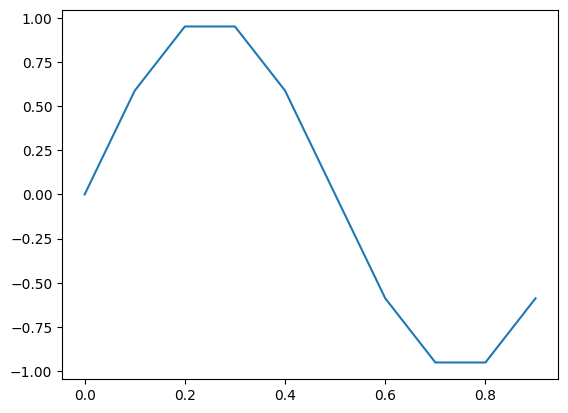

In [4]:
import matplotlib.pyplot as plt

t = np.arange(start=0.0, stop=1, step=0.1)

plt.plot(t, np.sin(2 * np.pi * t))
plt.show()

# Opmaak in orde brengen

Onderstaande code geeft dezelfde functie weer als hierboven, maar op een meer presenteerbare manier.

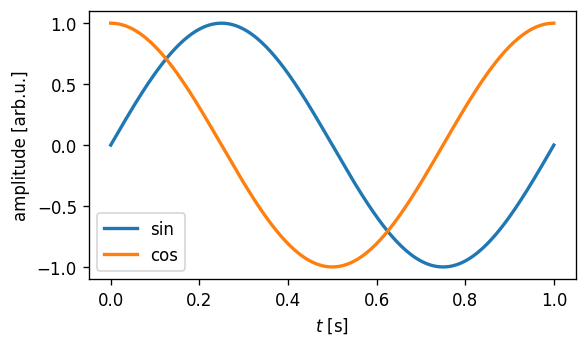

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))
t = np.linspace(start=0.0, stop=1.0, num=300)

ax.plot(t, np.sin(2 * np.pi * t), label='sin', linewidth=2)
ax.plot(t, np.cos(2 * np.pi * t), label='cos', linewidth=2)

ax.set_ylabel("amplitude [arb.u.]")
ax.set_xlabel("$t$ [s]")  # Je kunt LaTeX gebruiken om assen te benoemen!
ax.legend()

# Wat matplotlib magie...
plt.tight_layout()

# Opslaan?
# fig.savefig('sinusoïde.png')
plt.show()

# Interpolatie

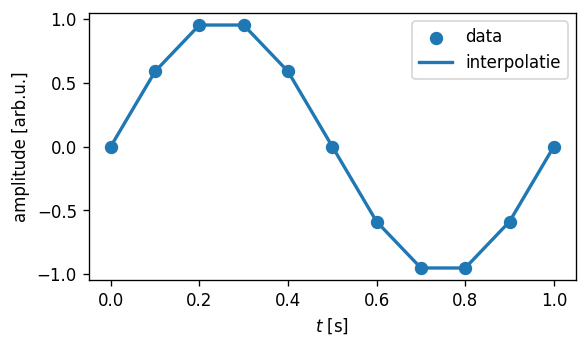

In [6]:
from scipy import interpolate

t = np.arange(start=0.0, stop=1.1, step=0.1)
f = np.sin(2*np.pi*t)
g = interpolate.interp1d(t, f)  # <--

d = np.linspace(start=0.0, stop=1.0, num=300)

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))
ax.scatter(t, f, label='data', linewidth=2)
ax.plot(d, g(d), label='interpolatie', linewidth=2)  # <--
ax.set_ylabel("amplitude [arb.u.]")
ax.set_xlabel("$t$ [s]")
ax.legend()
plt.tight_layout() ; plt.show()

# Fitten model aan data

We gaan een experiment analyseren om de wet van Ohm na te gaan. Namelijk, de gemeten gesloten klemspanning $V_K$ [V] bij een stroom $I$ [mA], over een bron $V_1$ met open klemspanning $V_0$. Volgens de theorie kan men de interne weerstand $R_i$ [$\Omega$] van de bron bepalen als:

$$R_i = \frac{V_o - V_k}{I}. $$

Als voorbeeld gaan we dit nu doen d.m.v. een lineaire fit  door $V_k(I)$:

$$V_k = -R_i \cdot I + V_o. $$

Eerst en vooral kijken we eerst naar hoe de data eruitziet:

In [7]:
# De data is in csv formaat gegeven. De extensie `.dat` kun je ook openen met je favoriete text editor.
# Opmerking 1: numpy ziet lijnen met een `#` symbool als comments en zal deze overslaan! (handig)
# Opmerking 2: numpy leest de data in als een **row-first** 2d matrix -> transponeren om column-first te lezen (.T)
data = np.loadtxt("data/ohm.dat", delimiter=",").T

# Maak gebruik van de header beschrijving in `kirchhoff_demo.dat` om te weten wat elke kolom voorstelt
I, V, dV = data[0], data[1], data[2]

In [8]:
def model(x, a, b):
    """Lineair model"""
    return a * x + b

[0.00413 0.00421 0.00665 0.00974 0.01284 0.01404 0.0186 ]
[ 4.13        4.27616162  4.42232323  4.56848485  4.71464646  4.86080808
  5.0069697   5.15313131  5.29929293  5.44545455  5.59161616  5.73777778
  5.88393939  6.03010101  6.17626263  6.32242424  6.46858586  6.61474747
  6.76090909  6.90707071  7.05323232  7.19939394  7.34555556  7.49171717
  7.63787879  7.7840404   7.93020202  8.07636364  8.22252525  8.36868687
  8.51484848  8.6610101   8.80717172  8.95333333  9.09949495  9.24565657
  9.39181818  9.5379798   9.68414141  9.83030303  9.97646465 10.12262626
 10.26878788 10.41494949 10.56111111 10.70727273 10.85343434 10.99959596
 11.14575758 11.29191919 11.43808081 11.58424242 11.73040404 11.87656566
 12.02272727 12.16888889 12.31505051 12.46121212 12.60737374 12.75353535
 12.89969697 13.04585859 13.1920202  13.33818182 13.48434343 13.63050505
 13.77666667 13.92282828 14.0689899  14.21515152 14.36131313 14.50747475
 14.65363636 14.79979798 14.9459596  15.09212121 15.23828283 15.38

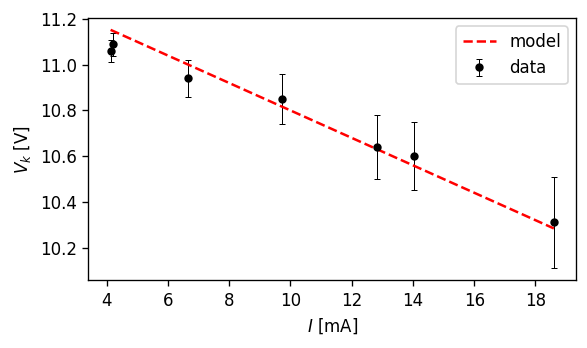

In [13]:
_, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))
print(I)
# We genereren een linspace om het model te plotten
x = np.linspace(np.min(I*1e3), np.max(I*1e3), 100)

# We schalen ook de stroom voor een beter leesbare x-as
ax.errorbar(I*1e3, V, yerr=dV, label="data",

        # De errorbars wat mooier maken :)
        marker="o", markersize=4, fmt=" ", color="black", ecolor="black", capsize=2, capthick=0.6, linewidth=0.6)

# Schatting van de fitparametes
ax.plot(x, model(x, -0.06, 11.4), 'r--', label="model")

ax.set_ylabel("$V_{k}$ [V]")
ax.set_xlabel("$I$ [mA]")
ax.legend()
    
plt.tight_layout() ; plt.show()

In [10]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(model, 1e3*I, V, sigma=dV)

fout = np.sqrt(np.diag(pcov))
labels = ("rico", "offset")
units = ("Ohm", "V")

# label,parameter, standaarddeviatie, unit
# zip: arrays samenvoegen
for l, p, s, u in zip(labels, popt, fout, units):
    print(f"{l}: {p:.3f} ± {s:.3f} {u}")

rico: -0.049 ± 0.003 Ohm
offset: 11.282 ± 0.020 V


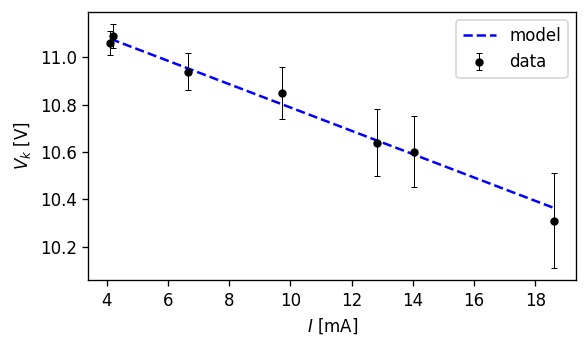

In [11]:
_, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))

# We genereren een linspace om het model te plotten
x = np.linspace(np.min(I*1e3), np.max(I*1e3), 100)

# We schalen ook de stroom voor een beter leesbare x-as
ax.errorbar(I*1e3, V, yerr=dV, label="data",

        # De errorbars wat mooier maken :)
        marker="o", markersize=4, fmt=" ", color="black", ecolor="black", capsize=2, capthick=0.6, linewidth=0.6)

# Schatting van de fitparametes
ax.plot(x, model(x, popt[0], popt[1]), 'b--', label="model")

ax.set_ylabel("$V_{k}$ [V]")
ax.set_xlabel("$I$ [mA]")
ax.legend()
    
plt.tight_layout() ; plt.show()


## Opdracht

### Radioactief verval

We hebben een onbekend isotoop gekregen van fluor (F). We proberen nu via zijn halfwaardetijd ($t_{1/2}$) te achterhalen welk isotoop we hebben gekregen. Online (https://nl.wikipedia.org/wiki/Isotopen_van_fluor) vinden we terug wat de halfwaardetijd van elk isotoop van fluor is. Hieruit kunnen we bepalen welk isotoop we hebben gekregen.

De data in 'fluor.dat' bevat een meting van de activiteit van het onbekend isotoop in functie van tijd (s). Activiteit (a.u.) van de stof is gemeten door het aantal radioactieve vervallen te meten in de tijd.

Je gaat deze data fitten aan de hand van het model voor radioactief verval $A(t) = A_0exp(-t/\tau)$ met $A(t)$ de activiteit op tijdstip $t$ en $A_0$ de activiteit bij het begin van de metingen. Via de relatie $t_{1/2} = \tau \ln(2)$ bepaal je de halfwaardetijd $t_{1/2}$ en zijn fout. Bepaal ook de activiteit op tijdstip 0 door $A_0$ en de fout hierop door de data te fitten.

To-do:

__1.__ Laad de data in het geheugen en plot deze met zijn error.

__2.__ Fit de data volgens het model $A(t) = A_0exp(-t/\tau)$. Definieer een nieuwe functie voor deze opdracht.

__3.__ Plot de data en de fit op 1 figuur. Zet in tekst de gevonden fitparameters met hun fout ook op de plot. Hiervoor kan je kijken in de documentatie: https://matplotlib.org/stable/tutorials/text/text_intro.html. Aan de hand van de gevonden $t_{1/2}$ kan je achterhalen welk isotoop het is.

__4.__ Hoe actief is mijn isotoop nog na 1 min? Met andere woorden: wat is de activiteit na 1 min. Gebruik hiervoor het model met de gevonden fitparameters.